In [1]:
import os
from numpy import *
import matplotlib.pyplot as plt
import pandas
import numpy as np
import seaborn as sb
from tabulate import tabulate

import dataframe_image as dfi
sb.set()

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
plt.rcParams["figure.figsize"] = [7, 5]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

<hr style="border-width:4px; border-color:coral"/>

# Timing : Read the data

<hr style="border-width:4px; border-color:coral"/>

In this notebook, you will 

* Read in the data from a data file

* Create a Pandas DataFrame

* Display the DataFrame

* Explore information from the data frame and practice using MultiIndex indexing in Python.

In [4]:
ex_list = ['shockbubble','bump','radial','swirl']  
#ex_list = ['bump'] 
example = ex_list[:]

path_to_data = './results'   # Data from sample shockbubble example.

<hr style="border-width:4px; border-color:coral"/>

# Data Tools (file)

<hr style="border-width:4px; border-color:coral"/>

In [5]:
%%file data_tools.py
import os
import pandas
import numpy as np

cols = ['walltime','advance','ghostfill','regrid','adapt',
            'adv_steps','adv_step2', 'mx', 'patch_comm', 'output', 'grids_proc',
            'memcopy_h2h','memcopy_h2d','memcopy_d2h']

    
dtypes = {'walltime': float,
          'advance': float,
          'ghostfill': float,
          'regrid': float,
          'adapt': float,
          'adv_steps': int,
          'adv_step2': int,
          'mx': int,
          'patch_comm': float,
          'output' : float,
          'grids_proc' : int,          
          'memcopy_h2h': float,
          'memcopy_h2d': float,
          'memcopy_d2h': float}    

def read_data(dir,device):
    fname = os.path.join('{:s}'.format(dir),'{:s}'.format(device),'results.out')
    df = pandas.read_table(fname,delim_whitespace=True)
    df.sort_values('p',inplace=True)

    f = '{:.2f}'.format
    fstr = {'p' : '{:3d}'.format,
            'walltime' : f,
            'advance' : f,
            'ghostfill' : f, 
            'patch_comm' : f,
            'regrid' : f, 
            'partition' : f,
            'adapt' : f,             
            'cfl' : f, 
            'grids_proc' : '{:4d}'.format, 
            'DOF/s' : '{:.1e}'.format,
            'Speedup': '{:.1f}'.format, 
            'Eff.' : '{:.1f}%'.format, 
            'output':'{:.1f}'.format,
            'memcopy_h2h' : '{:.2f}'.format, 
            'memcopy_d2h' : '{:.2f}'.format,
            'memcopy_h2d' : '{:.2f}'.format}

    return df,fstr

Overwriting data_tools.py


<hr style="border-width:4px; border-color:coral"/>

# Read data and set up Pandas MultiIndex

<hr style="border-width:4px; border-color:coral"/>

In [6]:
import data_tools
import os

idx = pandas.IndexSlice

procs = [1,2,4,8,16]
#procs = [1,2,4,6,8,16,24,48]

cols = ['walltime','advance','ghostfill','regrid','adapt',
            'adv_steps','adv_step2', 'mx', 'patch_comm', 'output', 'grids_proc',
            'memcopy_h2h','memcopy_h2d','memcopy_d2h']

iterables = [ex_list, ['GPU','CPU'], procs]

index = pandas.MultiIndex.from_product(iterables,names=['example','device','procs'])
df = pandas.DataFrame(index=index,columns=cols).sort_index()

# #ex_data = {}
for d in ex_list:
    data_dir = os.path.join(path_to_data,d)
    df_gpu,fstr = data_tools.read_data(data_dir,'gpu')
    df.loc[idx[d,'GPU',:],:] = df_gpu[cols].values
    
    df_cpu,fstr = data_tools.read_data(data_dir,'cpu')
    df.loc[idx[d,'CPU',:],:] = df_cpu[cols].values

# df.index.name = 'procs'
for col, dtype in data_tools.dtypes.items():
    df[col] = df[col].astype(dtype)

# example_data = df.transpose().unstack(level=2).stack(level=0)
example_data = df

#df = df.style.background_gradient() #style the table

#dfi.export(df,"results.png") #save the table
df

walltime   advance  ghostfill     regrid      adapt  \
example     device procs                                                        
bump        CPU    1      5501.500  5244.300   239.6900  16.833000   0.469910   
                   2      3903.700  2748.700   137.8400   7.076100   4.226600   
                   4       995.960   838.930    51.0010   2.236600   0.818060   
                   8       583.590   439.750    32.0360   1.225500   0.874880   
                   16      346.000   234.260    20.7940   0.711430   0.726510   
            GPU    1      1548.000   939.090   566.3000  40.074000   0.849210   
                   2      1114.900   461.070   213.4400  13.559000  12.965000   
                   4       234.560   135.660    59.2060   3.299700   0.942040   
                   8       204.770   121.700    35.2300   1.731000   0.957420   
                   16      187.440   128.450    16.0670   0.768940   0.630990   
radial      CPU    1      1244.700  1119.800   119.1000   4.924600   0.581040   
                   2       644.580   327.550    39.6010   1.563100  13.764000   
                   4        75.927    59.332     7.7560   0.258520   0.183100   
                   8        44.093    31.546     5.1607   0.152560   0.177030   
                   16       26.279    16.560     2.9832   0.094187   0.160480   
            GPU    1       209.190   119.190    79.1520   4.487000   0.186250   
                   2       156.090    52.369    31.7240   1.938000   3.176300   
                   4        30.585    14.119     8.5297   1.310600   0.194180   
                   8        26.168    12.354     5.0649   0.896850   0.184110   
                   16       20.990    12.004     2.2771   0.149470   0.131300   
shockbubble CPU    1      1373.600  1311.400    59.6370   1.816000   0.137210   
                   2       786.450   712.470    36.4580   1.030700   0.274550   
                   4       406.920   360.400    20.8150   0.501250   0.214310   
                   8       220.180   182.110    11.2780   0.271280   0.195470   
                   16      123.860    92.842     6.6721   0.165060   0.187830   
            GPU    1        63.023    24.038    15.0410   2.039800   0.044571   
                   2        56.740    19.003     9.3453   6.704400   0.617300   
                   4        40.639    21.143     3.9063   3.788500   0.082931   
                   8        35.595    17.923     2.8165   2.479700   0.086918   
                   16       44.129    22.569     3.2350   1.775600   0.135540   
swirl       CPU    1      2124.900  2069.800    51.8140   2.952300   0.242350   
                   2      1599.300  1360.100    49.7250   2.054200   1.818400   
                   4       643.120   572.490    24.4040   0.809410   0.790560   
                   8       360.400   300.370    14.7020   0.461100   0.822140   
                   16      173.890   139.880     6.3196   0.226530   0.548950   
            GPU    1       686.860   487.910   186.8800  10.358000   0.433970   
                   2       588.720   234.900    99.7340   4.988600   6.587700   
                   4       170.470   112.290    25.7450   1.121800   0.888130   
                   8       159.800   105.670    15.3870   0.670380   0.941820   
                   16      151.110    94.273     9.1633   0.387940   0.673540   

                          adv_steps  adv_step2  mx   patch_comm  output  \
example     device procs                                                  
bump        CPU    1        7469620       5239  32     0.071048     0.0   
                   2        3734810       2746  32  1003.200000     0.0   
                   4        1867400        838  32   102.100000     0.0   
                   8         933702        439  32   108.470000     0.0   
                   16        466851        234  32    88.051000     0.0   
            GPU    1        7469620        921  32     0.195470     0.0   
                   2   

<hr style="border-width:4px; border-color:coral"/>

# Exploring the data

<hr style="border-width:4px; border-color:coral"/>

The following will show you how to use a MultiIndex to extract data for a variety of purposes. 

In [7]:
# Extract all of the data for one example

example_data = df.loc['radial']

In [8]:
# Verify that same number of patch updates are done for both CPU and GPU codes

idx = pandas.IndexSlice
df_adv = example_data.loc[:,'adv_steps']
df_adv.unstack()

procs,1,2,4,8,16
device,,,,,
CPU,1058390,529196,264598,132299,66150
GPU,1058390,529196,264598,132299,66150


In [9]:
# Extract the number of advanced steps counter for all examples
adv = df.loc[idx[:, 'CPU':'GPU'], 'adv_steps'].unstack()
dfi.export(adv,"results.png") #save the table
adv

[0518/145335.771081:INFO:headless_shell.cc(660)] Written to file /var/folders/wb/55mw2drx2y15qr4p01jy43lw0000gn/T/tmpy1rw3th5/temp.png.


procs                     1        2        4        8       16
example     device                                             
bump        CPU      7469620  3734810  1867400   933702  466851
            GPU      7469620  3734810  1867400   933702  466851
radial      CPU      1058390   529196   264598   132299   66150
            GPU      1058390   529196   264598   132299   66150
shockbubble CPU      2411600  1205800   602900   301450  150725
            GPU      2411605  1205805   602900   301450  150725
swirl       CPU     10127600  5063800  2531900  1265950  632975
            GPU     10127600  5063800  2531900  1265950  632975

In [10]:
# Extract only the GPU data for a particular example

df_gpu = example_data.loc[('GPU'),:]
df_gpu

,walltime,advance,ghostfill,regrid,adapt,adv_steps,adv_step2,mx,patch_comm,output,grids_proc,memcopy_h2h,memcopy_h2d,memcopy_d2h
procs,,,,,,,,,,,,,,
1,209.190,119.190,79.1520,4.48700,0.18625,1058390,118,32,0.010247,0.0,89,45.67000,9.79690,10.14400
2,156.090,52.369,31.7240,1.93800,3.17630,529196,51,32,62.541000,0.0,44,19.57900,3.77230,4.05770
4,30.585,14.119,8.5297,1.31060,0.19418,264598,14,32,5.088100,0.0,22,3.41440,0.78441,0.69524
8,26.168,12.354,5.0649,0.89685,0.18411,132299,12,32,6.485600,0.0,11,1.64820,0.50642,0.41162
16,20.990,12.004,2.2771,0.14947,0.13130,66150,11,32,5.856000,0.0,5,0.49087,0.28788,0.19203


In [11]:
# Extract only the GPU data for a particular example
df_cpu = example_data.loc[('CPU'),:]
df_cpu

,walltime,advance,ghostfill,regrid,adapt,adv_steps,adv_step2,mx,patch_comm,output,grids_proc,memcopy_h2h,memcopy_h2d,memcopy_d2h
procs,,,,,,,,,,,,,,
1,1244.700,1119.800,119.1000,4.924600,0.58104,1058390,1118,32,0.066322,0.0,89,0.0,0.0,0.0
2,644.580,327.550,39.6010,1.563100,13.76400,529196,326,32,251.330000,0.0,44,0.0,0.0,0.0
4,75.927,59.332,7.7560,0.258520,0.18310,264598,59,32,8.173800,0.0,22,0.0,0.0,0.0
8,44.093,31.546,5.1607,0.152560,0.17703,132299,31,32,6.804400,0.0,11,0.0,0.0,0.0
16,26.279,16.560,2.9832,0.094187,0.16048,66150,16,32,6.141400,0.0,5,0.0,0.0,0.0


In [12]:
# Extract data from columns that account for most of the time spent. 

df_cols = example_data.loc[:,['walltime','advance','ghostfill','patch_comm']]

# Account for percentage of time for these three columns
percent_of_time = df_cols['advance'] + df_cols['ghostfill'] + df_cols['patch_comm']
df_cols['Total (%)'] = 100*percent_of_time/df_cols['walltime']
fstr['Total (%)'] = '{:.1f}%'.format
df_cols.style.format(fstr).set_caption('Most of the time is spent in ' \
                                       'advance, ghostfill and patch communication.  The last column ' \
                                      'indicates what percent of total time is spent in these ' \
                                      'three columns.')

In [13]:
# Extract CPU/GPU data for one example and display side-by-side

df_gpu = example_data.loc[:,['walltime','advance','ghostfill','patch_comm']]
df_gpu.unstack(level=0).style.format('{:.2f}'.format)

In [14]:
# Compare speed-up of GPU over the CPU for single example.  Highlight maximum speedup.

idx = pandas.IndexSlice
df1 = example_data.loc[:,['walltime','advance','ghostfill','patch_comm']]
(df1.loc['CPU']/df1.loc['GPU']).style.format('{:.1f}'.format).highlight_max()

,walltime,advance,ghostfill,patch_comm
procs,,,,
1,6.0,9.4,1.5,6.5
2,4.1,6.3,1.2,4.0
4,2.5,4.2,0.9,1.6
8,1.7,2.6,1.0,1.0
16,1.3,1.4,1.3,1.0


In [15]:
#2 GPUs vs 48 CPUs
df2_gpu = df1.loc['GPU'].iloc[[1]]

df2_gpu

,walltime,advance,ghostfill,patch_comm
procs,,,,
2,156.09,52.369,31.724,62.541


In [16]:
# df48_cpu = df1.loc['CPU'].iloc[[7]]
# df48_cpu 

In [17]:
# Extract wall time information for GPUs and CPUs

idx = pandas.IndexSlice
df_scale = pandas.DataFrame(data = example_data.loc[:,'walltime']).unstack(level=0).droplevel(0,axis=1)
df_scale

device,CPU,GPU
procs,,
1,1244.700,209.190
2,644.580,156.090
4,75.927,30.585
8,44.093,26.168
16,26.279,20.990


In [18]:
# Strong scale : T_0/T_p
df_scale = pandas.DataFrame(data = example_data.loc[:,'walltime']).unstack(level=0).droplevel(0,axis=1)
df_scale['CPU_scaling'] = df_scale.loc[1,('CPU')]/df_scale.loc[:,('CPU')]
df_scale['GPU_scaling'] = df_scale.loc[1,('GPU')]/df_scale.loc[:,('GPU')]
df_scale.style.format('{:.1f}'.format)\
      .background_gradient(subset=['CPU_scaling','GPU_scaling'],cmap='YlOrBr',low=0,high=1)

device,CPU,GPU,CPU_scaling,GPU_scaling
procs,,,,
1,1244.7,209.2,1.0,1.0
2,644.6,156.1,1.9,1.3
4,75.9,30.6,16.4,6.8
8,44.1,26.2,28.2,8.0
16,26.3,21.0,47.4,10.0


In [19]:
# Compare multiple CPU cores to one GPU or two GPUs. 
df_scale = pandas.DataFrame(data = example_data.loc[:,'walltime']).unstack(level=0).droplevel(0,axis=1)

df_scale['CPUs/1 GPU'] = df_scale.loc[:,'CPU']/df_scale.loc[1,'GPU']
df_scale['CPUs/2 GPUs'] = df_scale.loc[:,'CPU']/df_scale.loc[2,'GPU']
df_scale.style.format('{:.1f}'.format)\
      .background_gradient(subset=['CPUs/1 GPU','CPUs/2 GPUs'],cmap='YlOrBr',low=0,high=1) \
      .set_caption("Numbers indicate speed-up of multiple CPUs vs. 1 or 2 GPUs")

device,CPU,GPU,CPUs/1 GPU,CPUs/2 GPUs
procs,,,,
1,1244.7,209.2,6.0,8.0
2,644.6,156.1,3.1,4.1
4,75.9,30.6,0.4,0.5
8,44.1,26.2,0.2,0.3
16,26.3,21.0,0.1,0.2


In [20]:
# Extract the number of advanced steps counter for all examples
#ad = df.loc[idx[:, 'CPU'], 'regrid','adv_steps','ghostfill','patch_comm'].unstack()
df1 = example_data.loc[:,['walltime','advance','ghostfill','patch_comm']]
#ad = df.loc[idx['radial', 'CPU'], 'regrid'].unstack()
#dfi.export(adv,"results.png") #save the table


In [21]:
# # Compare speed-up of GPU over the CPU: 24 CPUs Vs 1 GPU, 48 CPUS VS 6 GPUs
# df1_gpu = df1.loc['GPU'].iloc[[0]]
# df6_gpu = df1.loc['GPU'].iloc[[3]]
# df24_cpu = df1.loc['CPU'].iloc[[6]]
# df48_cpu = df1.loc['CPU'].iloc[[7]]



# col_names = ['Resources','walltime','advance','ghostfill','patch_comm','Total']
# data = [["24 CPU Cores",np.array(df24_cpu['walltime'])[0]
#         ,np.array(df24_cpu['advance'])[0]
#         ,np.array(df24_cpu['ghostfill'])[0]
#         ,np.array(df24_cpu['patch_comm'])[0], sum([np.array(df24_cpu['walltime'])[0]
#         ,np.array(df24_cpu['advance'])[0]
#         ,np.array(df24_cpu['ghostfill'])[0]
#         ,np.array(df24_cpu['patch_comm'])[0]])
#         ],
#        ["1 GPU",np.array(df1_gpu['walltime'])[0]
#         ,np.array(df1_gpu['advance'])[0]
#         ,np.array(df1_gpu['ghostfill'])[0]
#         ,np.array(df1_gpu['patch_comm'])[0],sum([np.array(df1_gpu['advance'])[0]
#         ,np.array(df1_gpu['ghostfill'])[0]
#         ,np.array(df1_gpu['patch_comm'])[0]])
#        ],
#        ['Speedup',np.array(df24_cpu['walltime'])[0]/np.array(df1_gpu['walltime'])[0],
#         np.array(df24_cpu['advance'])[0]/np.array(df1_gpu['advance'])[0],
#         np.array(df24_cpu['ghostfill'])[0]/np.array(df1_gpu['ghostfill'])[0],
#         np.array(df24_cpu['patch_comm'])[0]/np.array(df1_gpu['patch_comm'])[0],sum([np.array(df24_cpu['walltime'])[0]
#         ,np.array(df24_cpu['advance'])[0]
#         ,np.array(df24_cpu['ghostfill'])[0]
#         ,np.array(df24_cpu['patch_comm'])[0]])/sum([np.array(df1_gpu['advance'])[0]
#         ,np.array(df1_gpu['ghostfill'])[0]
#         ,np.array(df1_gpu['patch_comm'])[0]])

#        ],
#        ["48 CPU Cores",np.array(df48_cpu['walltime'])[0]
#         ,np.array(df48_cpu['advance'])[0]
#         ,np.array(df48_cpu['ghostfill'])[0]
#         ,np.array(df48_cpu['patch_comm'])[0],sum([np.array(df48_cpu['walltime'])[0]
#         ,np.array(df48_cpu['advance'])[0]
#         ,np.array(df48_cpu['ghostfill'])[0]
#         ,np.array(df48_cpu['patch_comm'])[0]])
#        ],
#        ["6 GPUs",np.array(df6_gpu['walltime'])[0]
#         ,np.array(df6_gpu['advance'])[0]
#         ,np.array(df6_gpu['ghostfill'])[0]
#         ,np.array(df6_gpu['patch_comm'])[0],sum([np.array(df1_gpu['walltime'])[0]
#         ,np.array(df6_gpu['advance'])[0]
#         ,np.array(df6_gpu['ghostfill'])[0]
#         ,np.array(df6_gpu['patch_comm'])[0]])
#        ],
#        ['Speedup',np.array(df48_cpu['walltime'])[0]/np.array(df6_gpu['walltime'])[0],
#         np.array(df48_cpu['advance'])[0]/np.array(df6_gpu['advance'])[0],
#         np.array(df48_cpu['ghostfill'])[0]/np.array(df6_gpu['ghostfill'])[0],
#         np.array(df48_cpu['patch_comm'])[0]/np.array(df6_gpu['patch_comm'])[0],sum([np.array(df48_cpu['walltime'])[0]
#         ,np.array(df48_cpu['advance'])[0]
#         ,np.array(df48_cpu['ghostfill'])[0]
#         ,np.array(df48_cpu['patch_comm'])[0]])/sum([np.array(df6_gpu['walltime'])[0]
#         ,np.array(df6_gpu['advance'])[0]
#         ,np.array(df6_gpu['ghostfill'])[0]
#         ,np.array(df6_gpu['patch_comm'])[0]])
#        ]
#        ]

# print('Table: Bump GPU vs CPU speed up for walltime, advance, ghostfill, and patch communication')
# print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


## Plotting

In [22]:
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

adv = df.loc[idx[:, 'CPU':'GPU'], 'walltime'].unstack()

Text(0.5, 1.0, 'Bump')

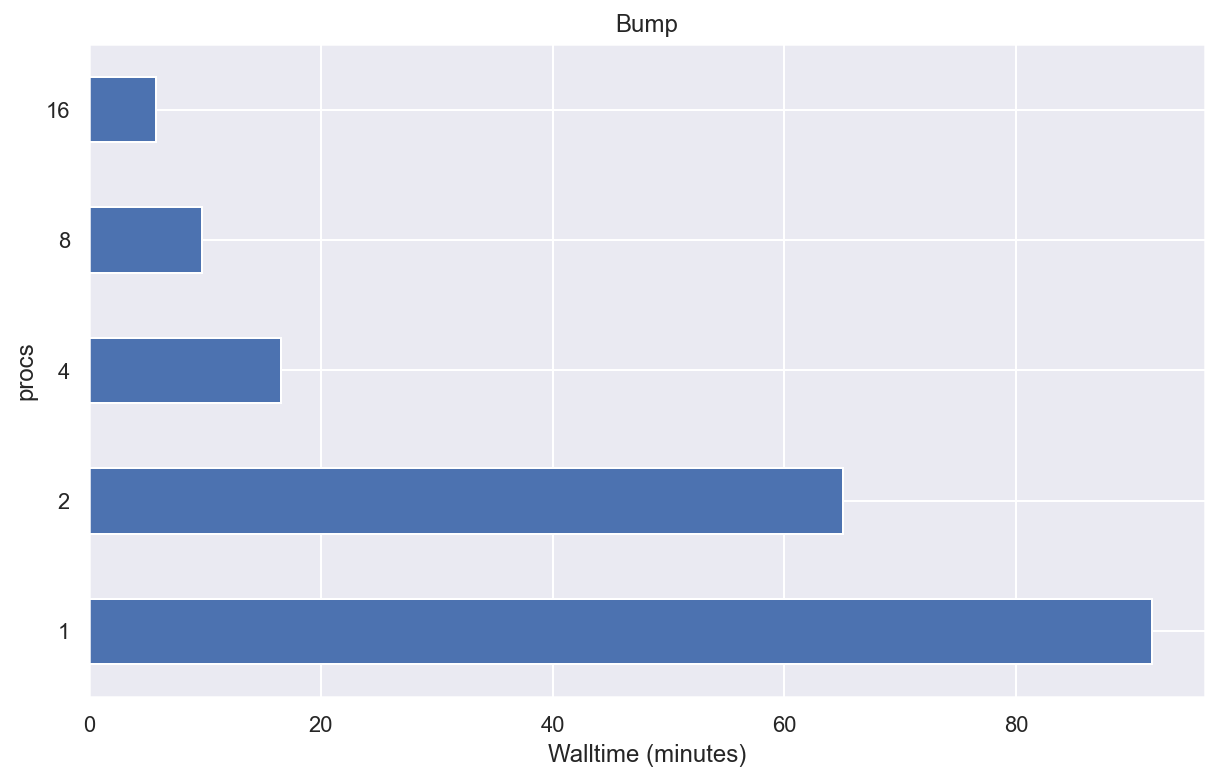

In [23]:
df_bump = adv.loc['bump','CPU']/60
df_bump.plot(kind='barh')
plt.xlabel('Walltime (minutes)')
plt.title('Bump')

Text(0.5, 0, 'Walltime (minutes)')

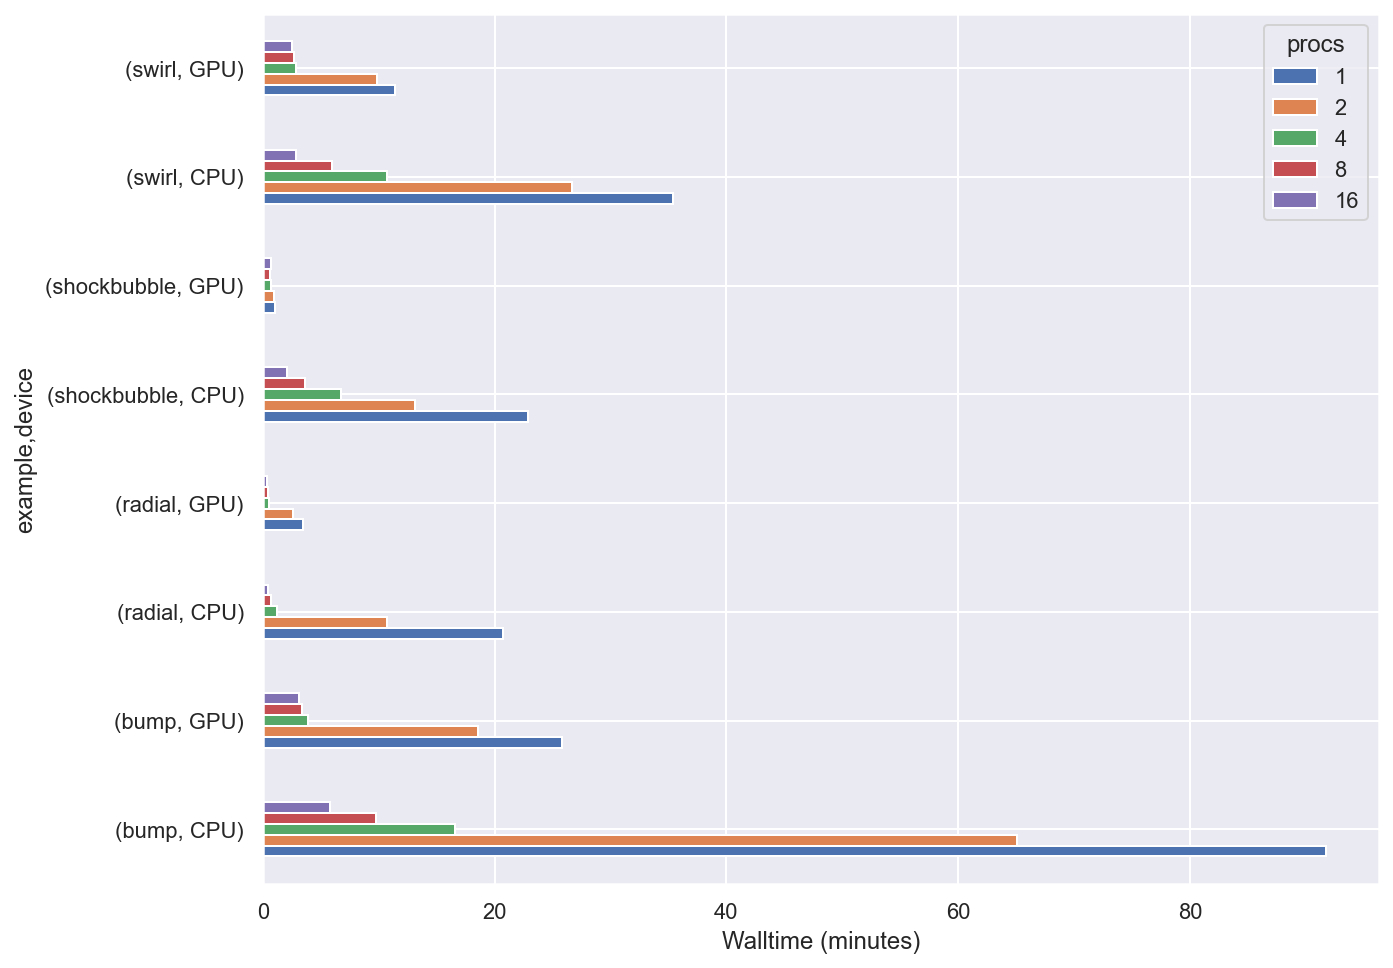

In [24]:
df_all = adv.loc[:,:]/60
df_all.plot(kind='barh',figsize=(10,8))
plt.xlabel('Walltime (minutes)')

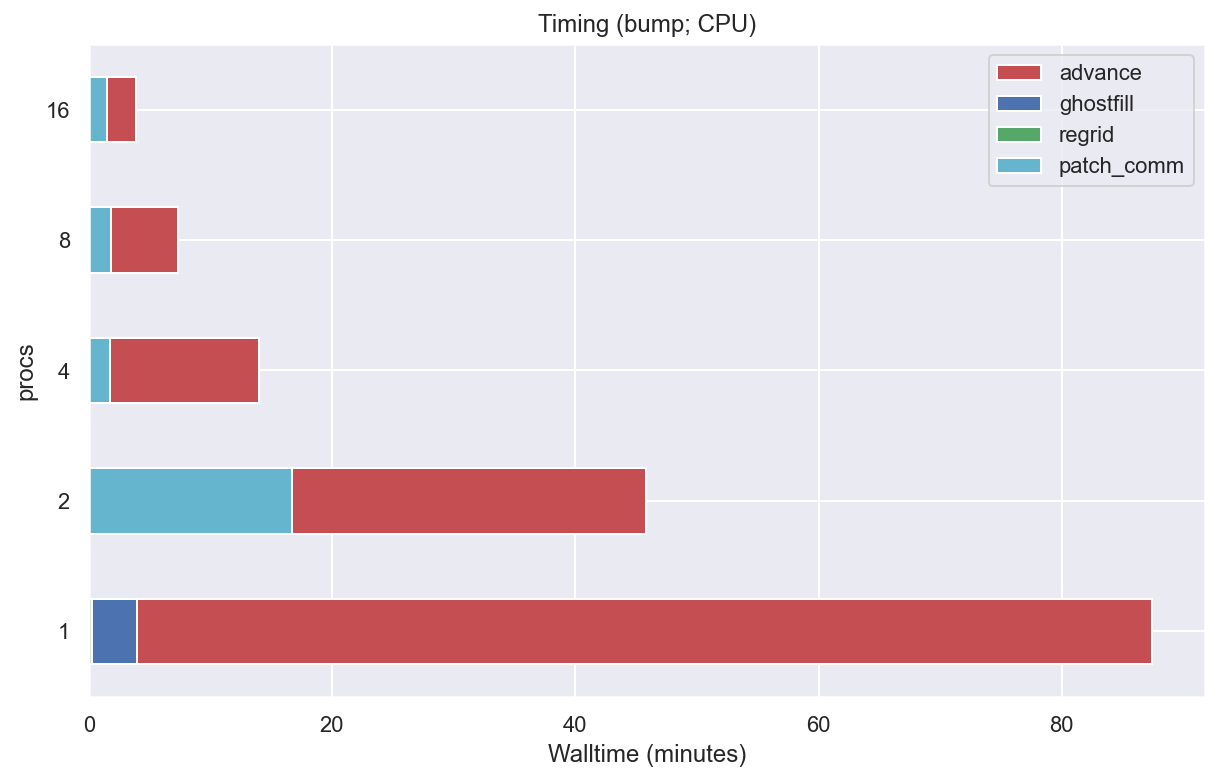

In [25]:
adv = df.loc[idx[:, 'CPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['bump','CPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (bump; CPU)')
plt.show()

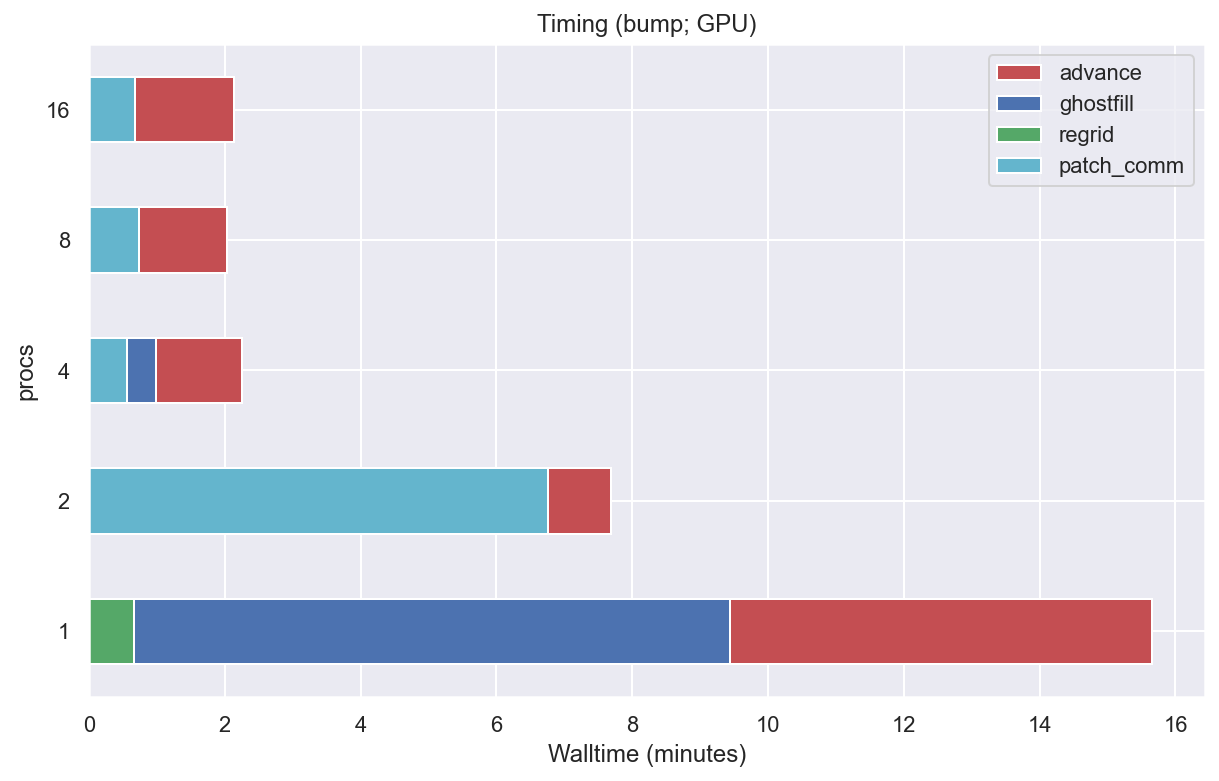

In [26]:
adv = df.loc[idx[:, 'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['bump','GPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (bump; GPU)')
plt.show()

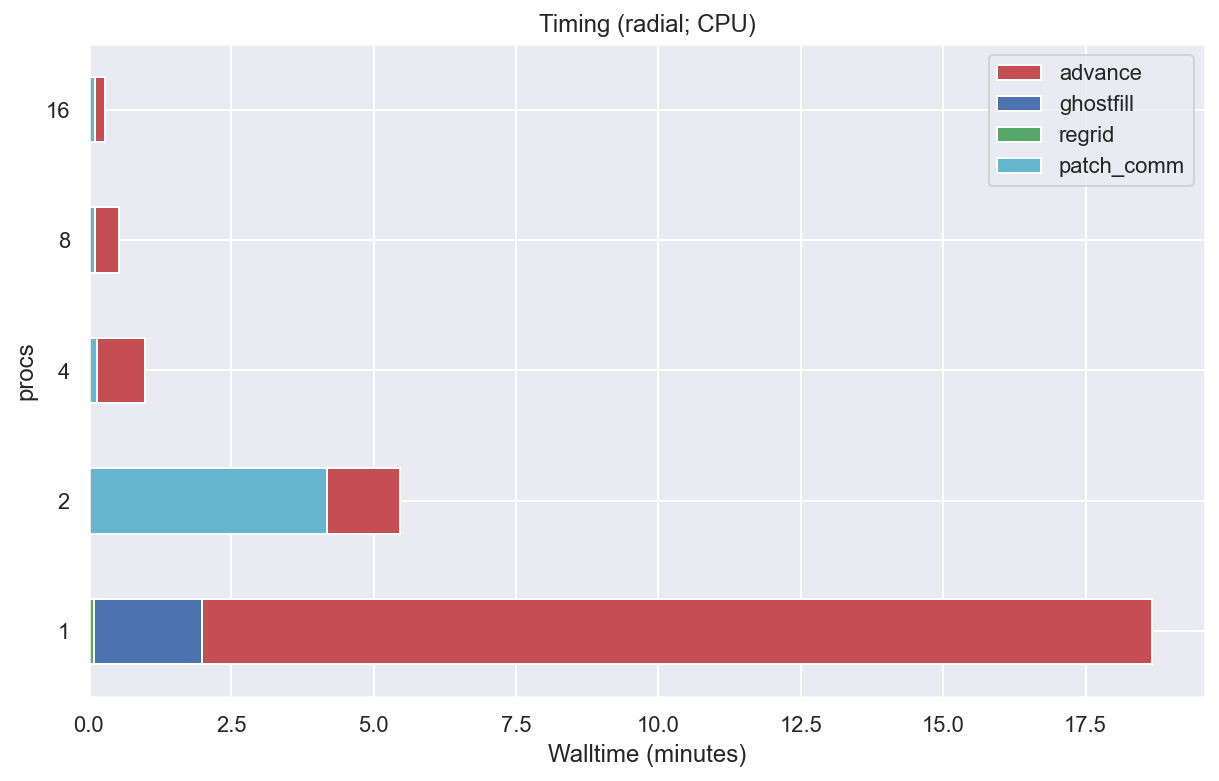

In [27]:
adv = df.loc[idx[:, 'CPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['radial','CPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (radial; CPU)')
plt.show()

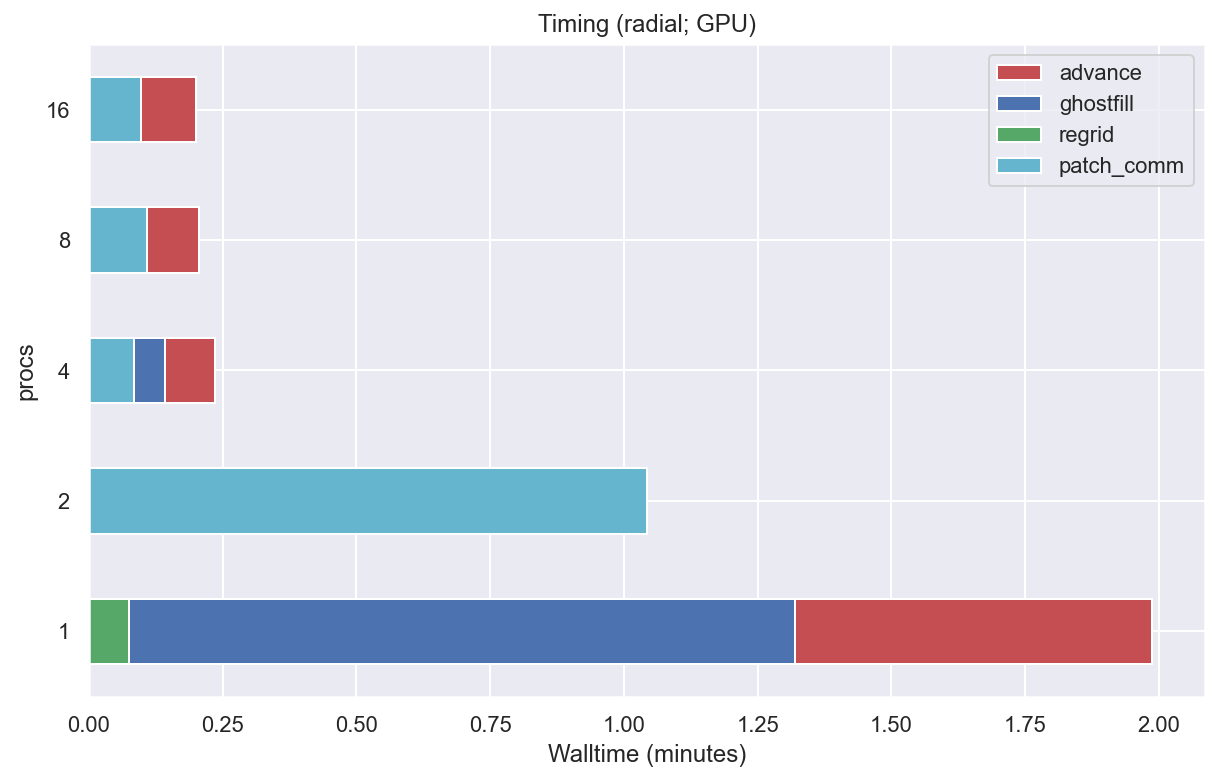

In [28]:
adv = df.loc[idx[:, 'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['radial','GPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (radial; GPU)')
plt.show()

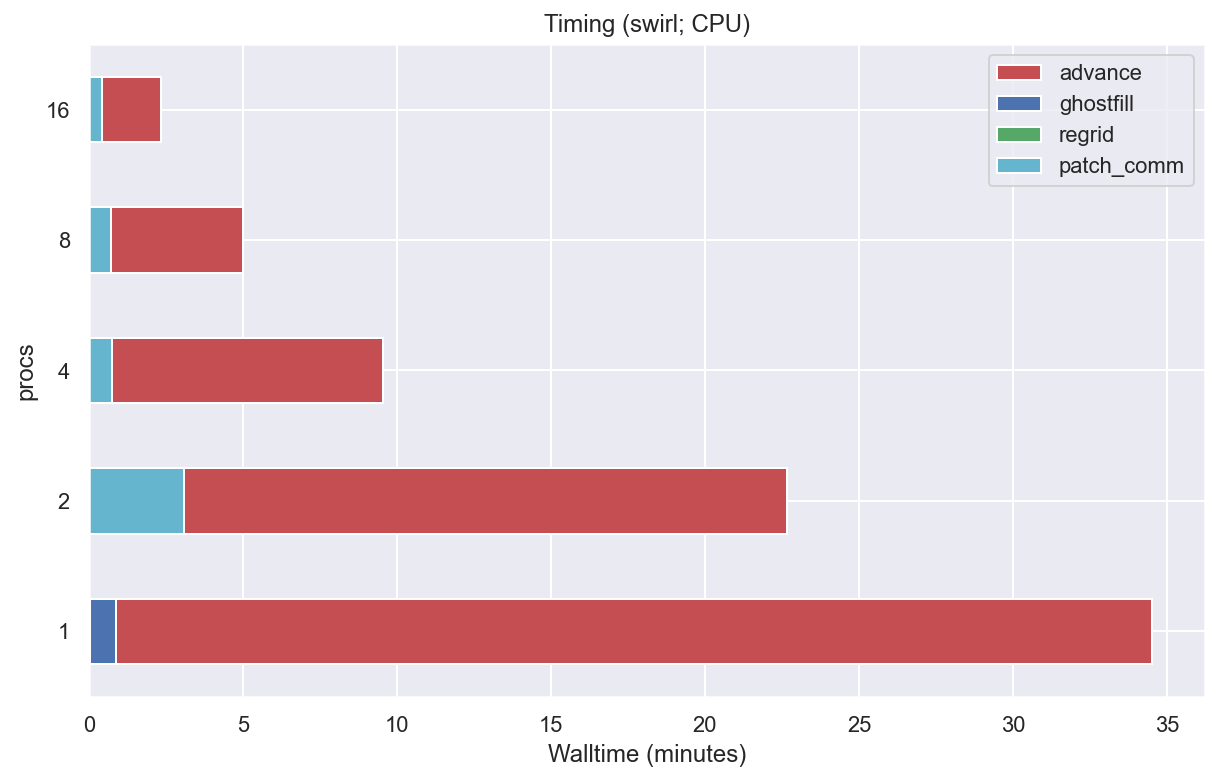

In [29]:
adv = df.loc[idx[:, 'CPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['swirl','CPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (swirl; CPU)')
plt.show()

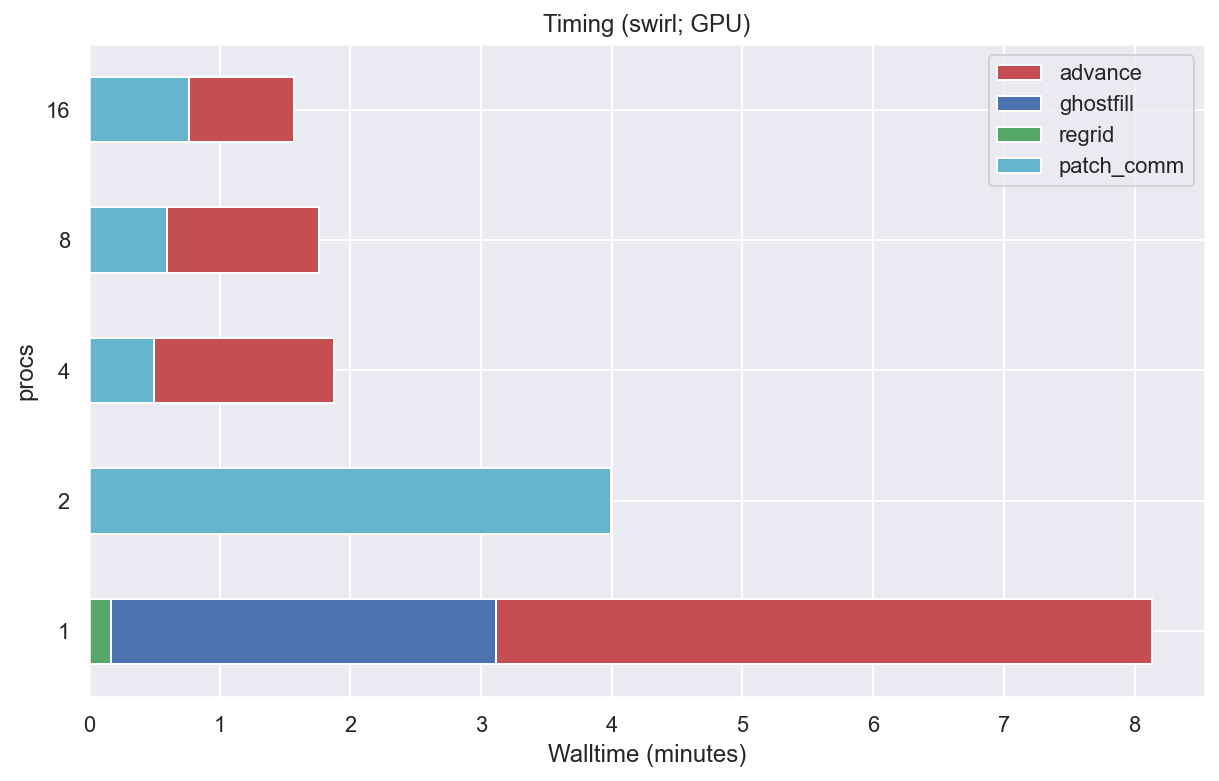

In [30]:
adv = df.loc[idx[:, 'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['swirl','GPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (swirl; GPU)')
plt.show()

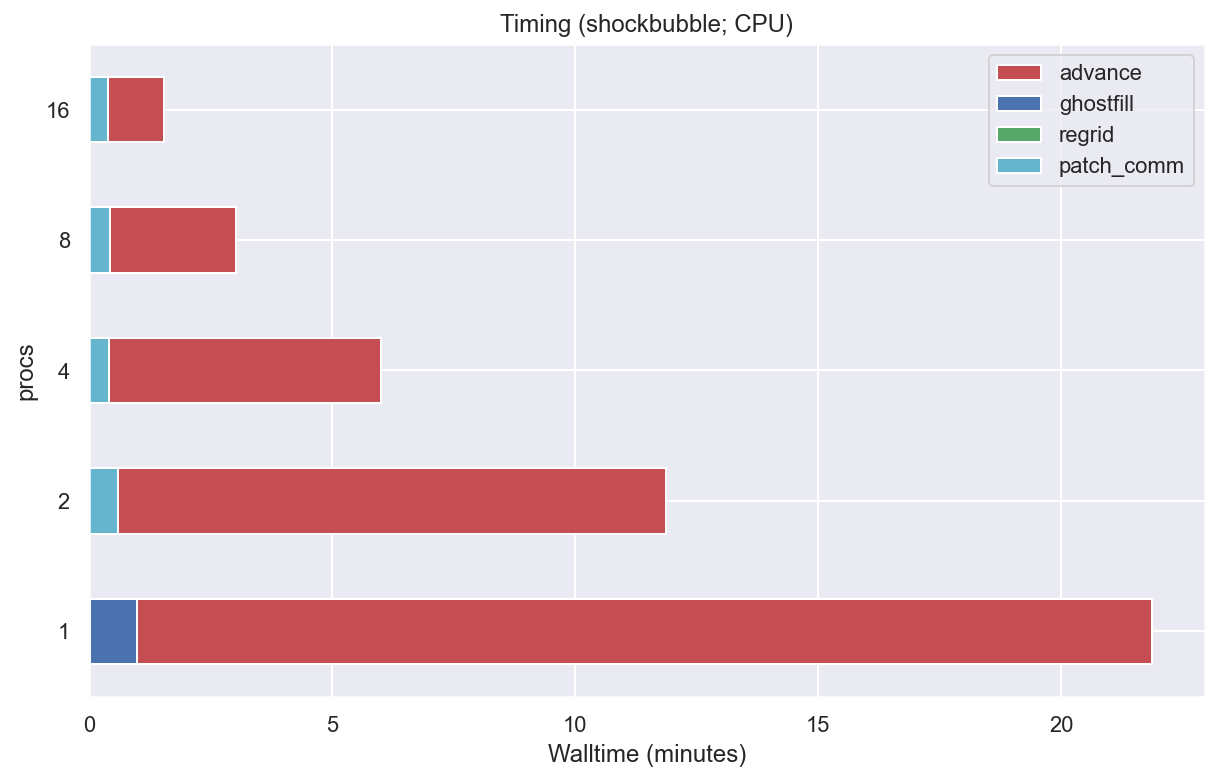

In [31]:
adv = df.loc[idx[:, 'CPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['shockbubble','CPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (shockbubble; CPU)')
plt.show()

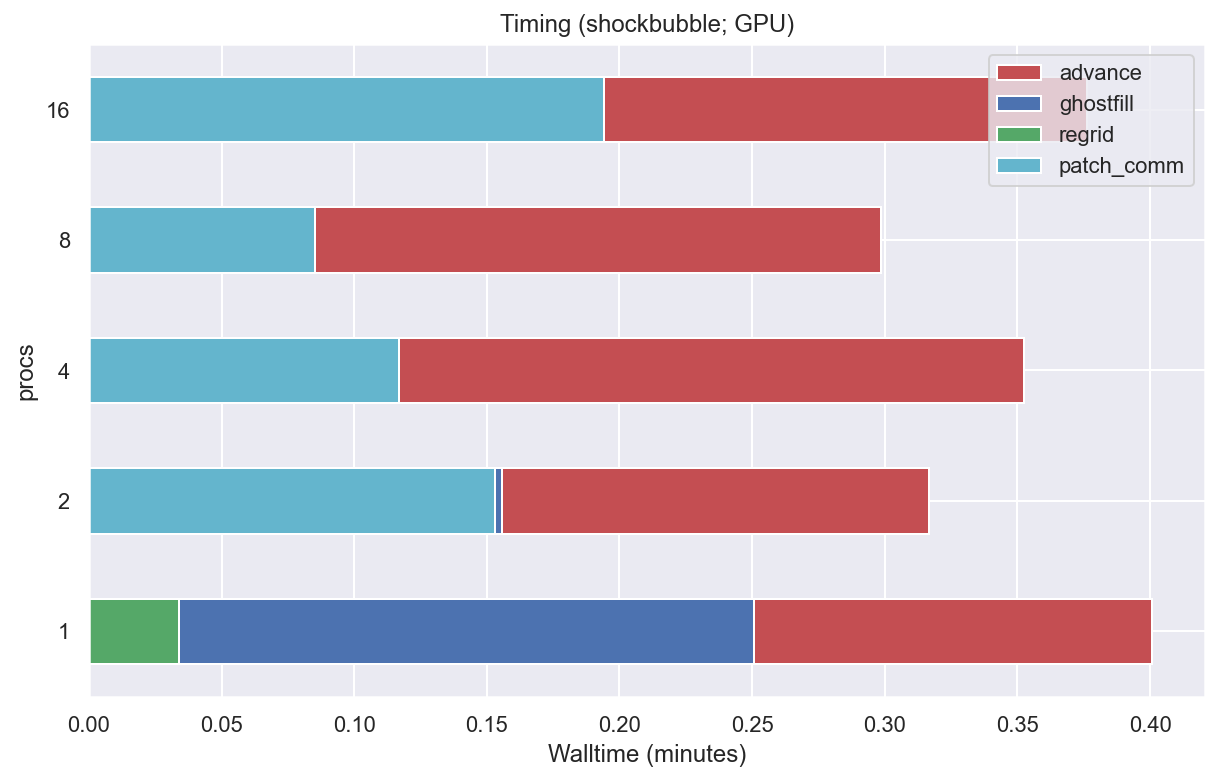

In [32]:
adv = df.loc[idx[:, 'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_all = adv.loc['shockbubble','GPU']/60
df_all.loc['advance'].plot.barh(color='r',label='advance')
df_all.loc['ghostfill'].plot.barh(color='b',label='ghostfill')
df_all.loc['regrid'].plot.barh(color='g',label='regrid')
df_all.loc['patch_comm'].plot.barh(color='c',label='patch_comm')
plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (shockbubble; GPU)')
plt.show()

Text(0.5, 0, 'Walltime (minutes)')

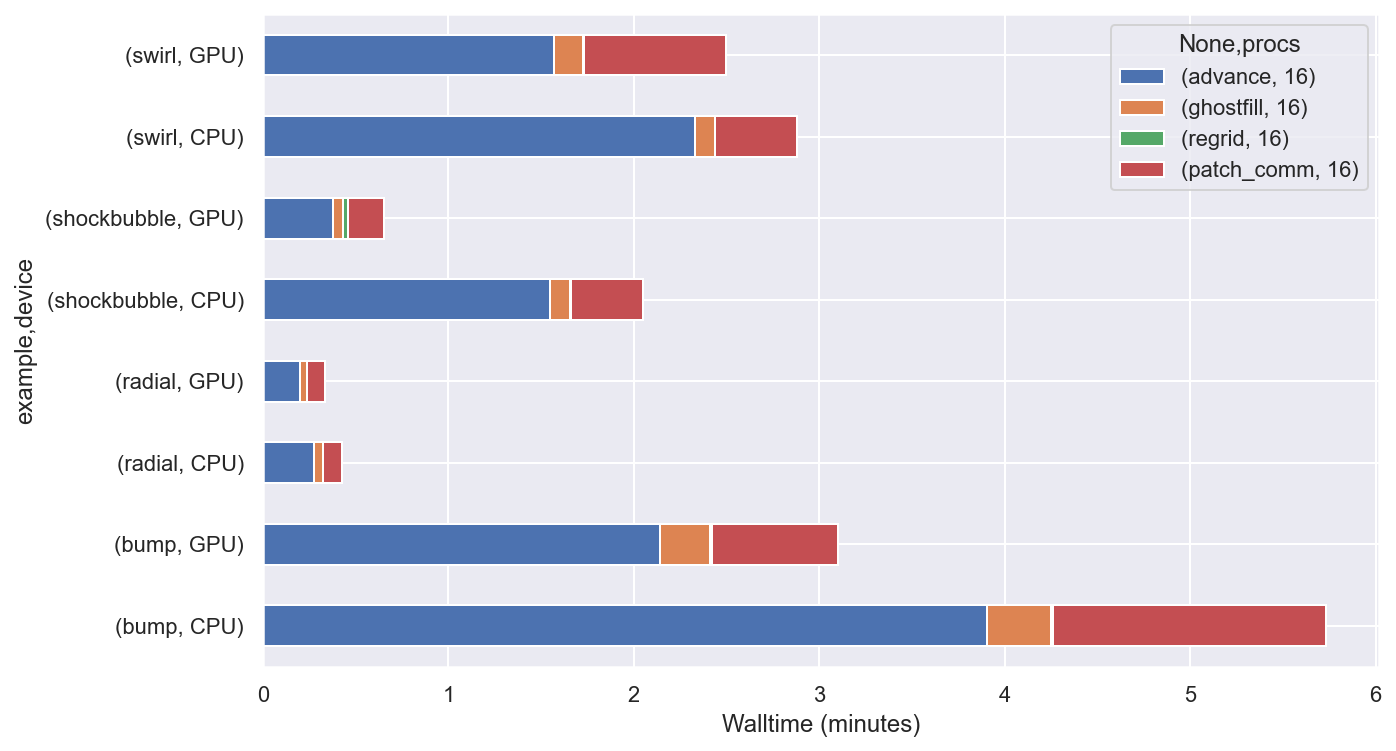

In [33]:
adv = df.loc[idx[:, 'CPU':'GPU',16], ['advance','ghostfill','regrid','patch_comm']].unstack()
adv
df_all = adv.loc[:,:]/60
df_all.plot.barh(stacked=True)
plt.xlabel('Walltime (minutes)')

Text(0.5, 0, 'Walltime (minutes)')

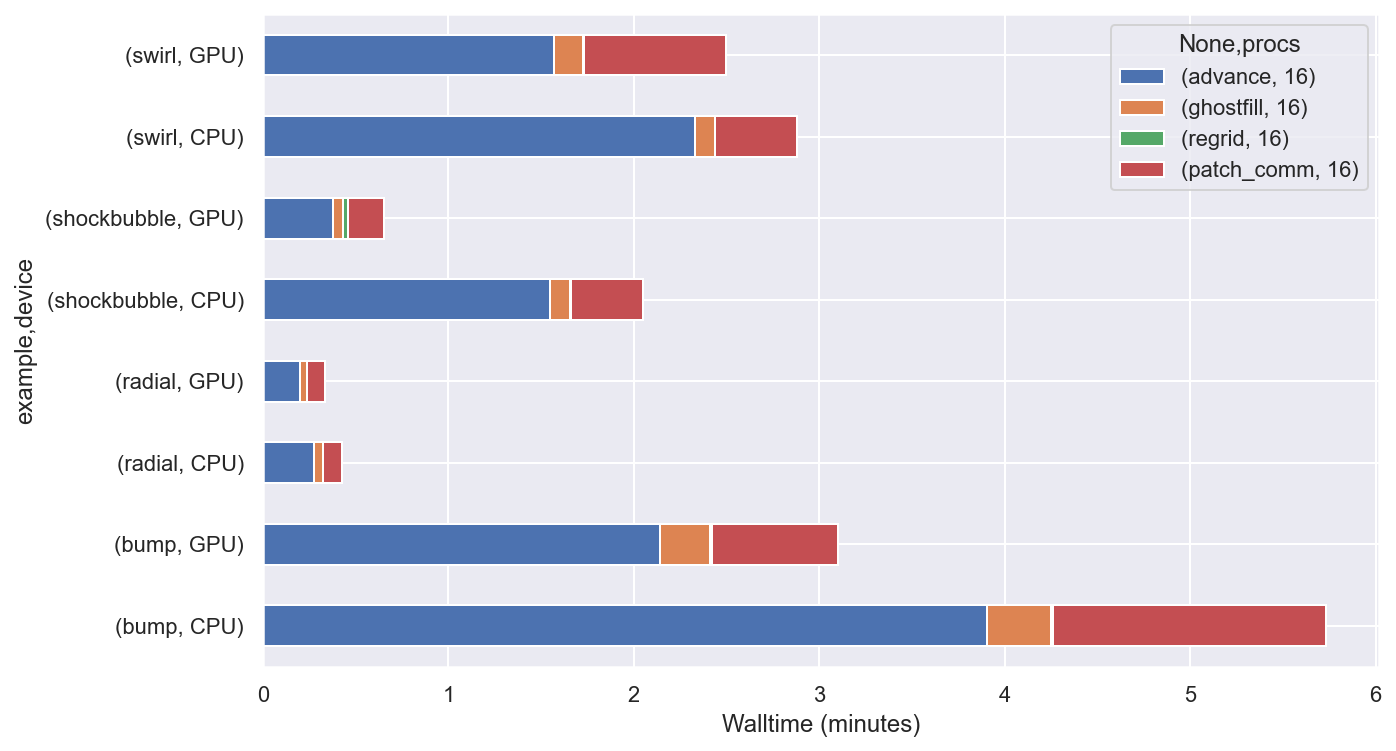

In [34]:
adv = df.loc[idx[:, 'CPU':'GPU',16], ['advance','ghostfill','regrid','patch_comm']].unstack()
adv
df_all = adv.loc[:,:]/60
df_all.plot.barh(stacked=True)
plt.xlabel('Walltime (minutes)')

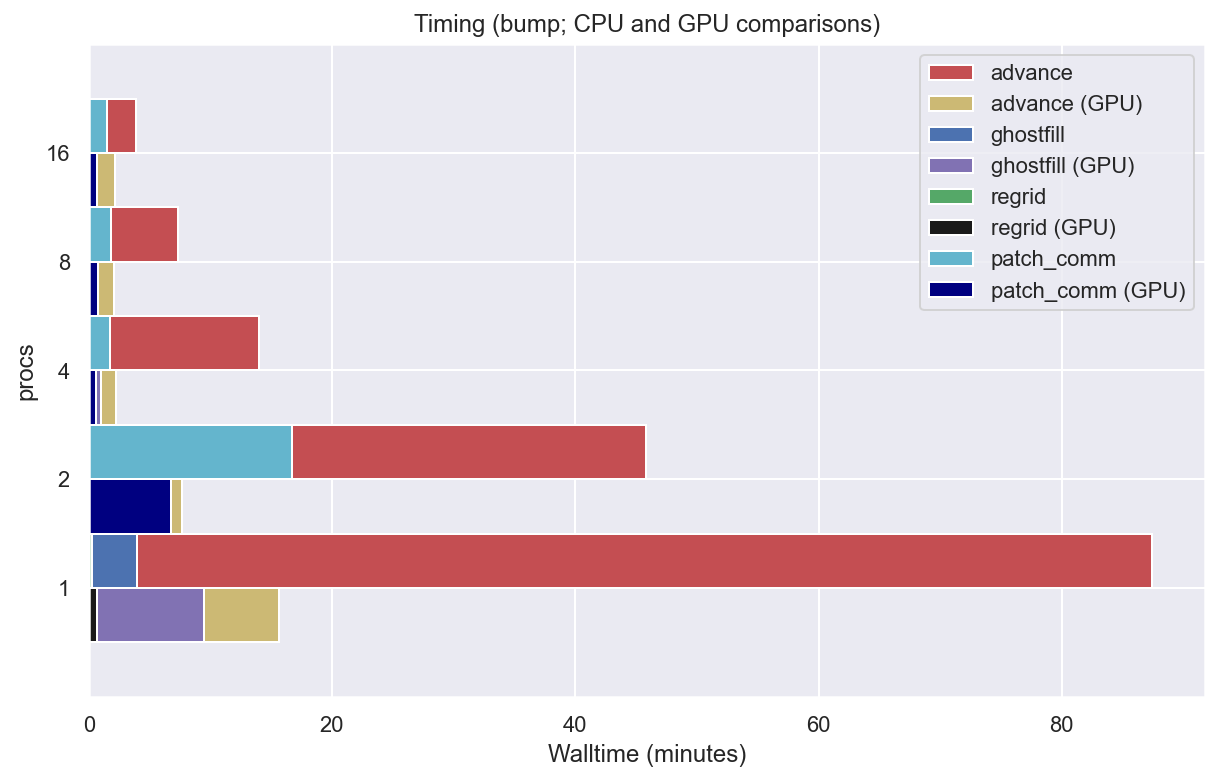

In [35]:
cpu = df.loc[idx[:, 'CPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()
gpu = df.loc[idx[:, 'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()

df_alc = cpu.loc['bump','CPU']/60
df_alg = gpu.loc['bump','GPU']/60

df_alc.loc['advance'].plot.barh(position=0,color='r',label='advance')
df_alg.loc['advance'].plot.barh(position=1,color='y',label='advance (GPU)')
df_alc.loc['ghostfill'].plot.barh(position=0,color='b',label='ghostfill')
df_alg.loc['ghostfill'].plot.barh(position=1,color='m',label='ghostfill (GPU)')
df_alc.loc['regrid'].plot.barh(position=0,color='g',label='regrid')
df_alg.loc['regrid'].plot.barh(position=1,color='k',label='regrid (GPU)')
df_alc.loc['patch_comm'].plot.barh(position=0,color='c',label='patch_comm')
df_alg.loc['patch_comm'].plot.barh(position=1,color='navy',label='patch_comm (GPU)')

plt.legend()
plt.xlabel('Walltime (minutes)')
plt.title('Timing (bump; CPU and GPU comparisons)')
plt.ylim(-1,5)

plt.show()



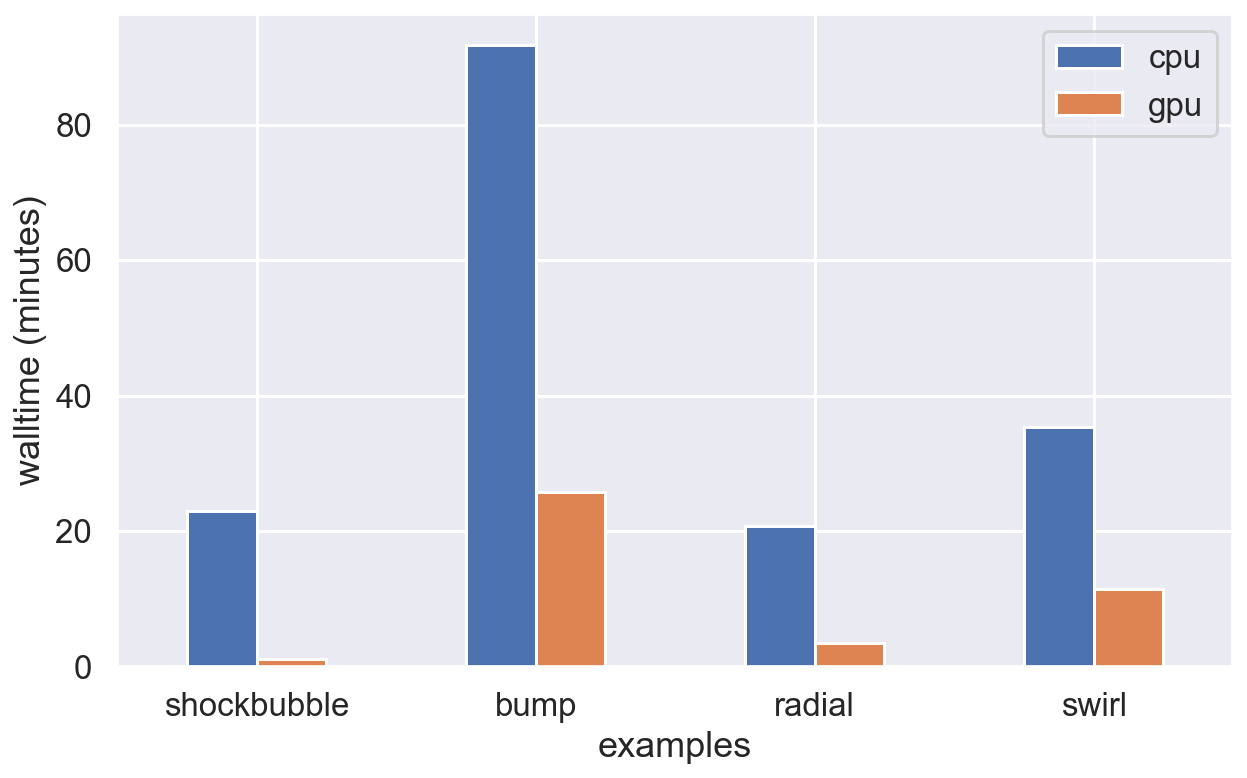

In [40]:
# #extract rows
sw = df.loc['swirl']
sb = df.loc['shockbubble']
bp = df.loc['bump']
rd = df.loc['radial']

sw_gpu = sw.loc[('GPU'),:]
sb_gpu = sb.loc[('GPU'),:]
bp_gpu = bp.loc[('GPU'),:]
rd_gpu = rd.loc[('GPU'),:]

sw_cpu = sw.loc[('CPU'),:]
sb_cpu = sb.loc[('CPU'),:]
bp_cpu = bp.loc[('CPU'),:]
rd_cpu = rd.loc[('CPU'),:]

#cpu_walltime
sw_cpu_w = np.array(sw_cpu['walltime'])/60
sb_cpu_w = np.array(sb_cpu['walltime'])/60
bp_cpu_w = np.array(bp_cpu['walltime'])/60
rd_cpu_w = np.array(rd_cpu['walltime'])/60

#gpu_walltime
sw_gpu_w = np.array(sw_gpu['walltime'])/60
sb_gpu_w = np.array(sb_gpu['walltime'])/60
bp_gpu_w = np.array(bp_gpu['walltime'])/60
rd_gpu_w = np.array(rd_gpu['walltime'])/60

wall_cpu = [max(sb_cpu_w), max(bp_cpu_w), max(rd_cpu_w), max(sw_cpu_w)]
wall_gpu = [max(sb_gpu_w), max(bp_gpu_w), max(rd_gpu_w), max(sw_gpu_w)]

dfp = pandas.DataFrame({'cpu': wall_cpu,
                   'gpu': wall_gpu}, index=ex_list)

ax = dfp.plot.bar(rot=0)
plt.ylabel('walltime (minutes)')
plt.xlabel('examples')
plt.savefig('wall_time')
plt.show()


In [36]:
def plot_(bump,bum):
    import seaborn as sns
    sns.set()
    
    a = bump.loc[:,'advance']
    b = bump.loc[:,'ghostfill']
    c = bump.loc[:,'regrid']
    d = bump.loc[:,'patch_comm']

    pos_mut_pcts = array(a.iloc[0])
    pos_cna_pcts = array(b.iloc[0])
    pos_both_pcts = array(c.iloc[0])
    pos = array(d.iloc[0])
    neg = array(d.iloc[1])
    neg_mut_pcts = array(a.iloc[1])
    neg_cna_pcts = array(b.iloc[1])
    neg_both_pcts = array(c.iloc[1])
    genes = ['1','2','4','8','16']

    with sns.axes_style("white"):
        sns.set_style("ticks")
        sns.set_context("talk")
#         sns.set()

        # plot details
        bar_width = 0.25
        epsilon = .015
        line_width = 1
        opacity = 0.7
        pos_bar_positions = np.arange(len(pos_mut_pcts))
        neg_bar_positions = pos_bar_positions + bar_width


        # make bar plots
        plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                                  label='Advance')
        plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                                  bottom=pos_mut_pcts,
                                  alpha=opacity,
                                  linewidth=line_width,
                                  label='Ghostfill')
        plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                                   bottom=pos_cna_pcts+pos_mut_pcts,
                                   alpha=opacity,
                                   linewidth=line_width,
                                   label='Regrid')
        plt.bar(pos_bar_positions, pos, bar_width-epsilon,
                                   bottom=pos_cna_pcts+pos_mut_pcts,
                                   alpha=opacity,
                                   linewidth=line_width,
                                   label='Patch_comm')
        plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                                  label='Adavance (GPU)')
        plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                                  bottom=neg_mut_pcts,
                                  linewidth=line_width,
                                  label='Ghostfill (GPU)')
        plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                                   bottom=neg_cna_pcts+neg_mut_pcts,
                                   linewidth=line_width,
                                   label='Regrid (GPU)')
        plt.bar(neg_bar_positions, neg, bar_width-epsilon,
                                   bottom=neg_cna_pcts+neg_mut_pcts,
                                   linewidth=line_width,
                                   label='Patch_comm (GPU)')

        plt.xticks((neg_bar_positions+pos_bar_positions)/2, genes, rotation=360)
        plt.ylabel('Time (minutes)')
        plt.xlabel('procs')
        plt.legend()
        plt.title('Timing ({:s}'.format(bum)+'; CPU and GPU comparisons)')
        plt.savefig(bum)
        plt.show()

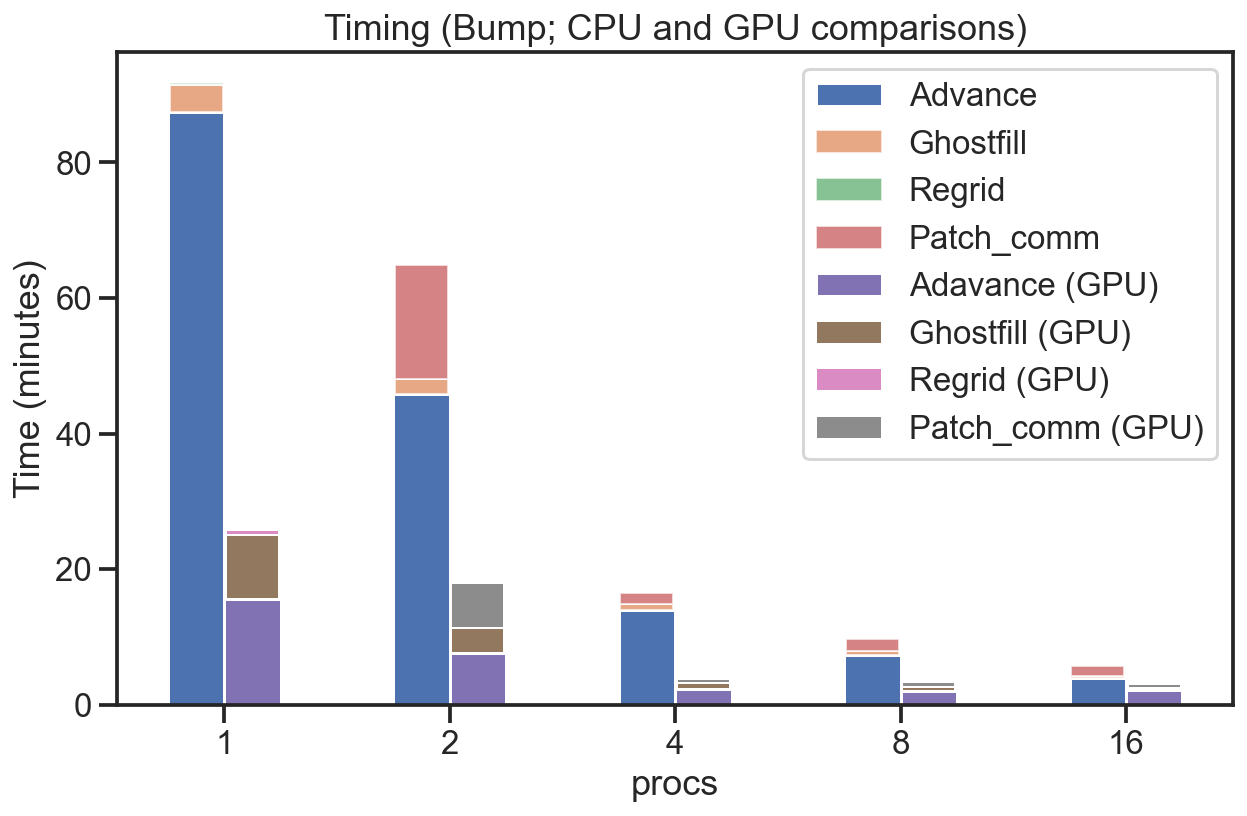

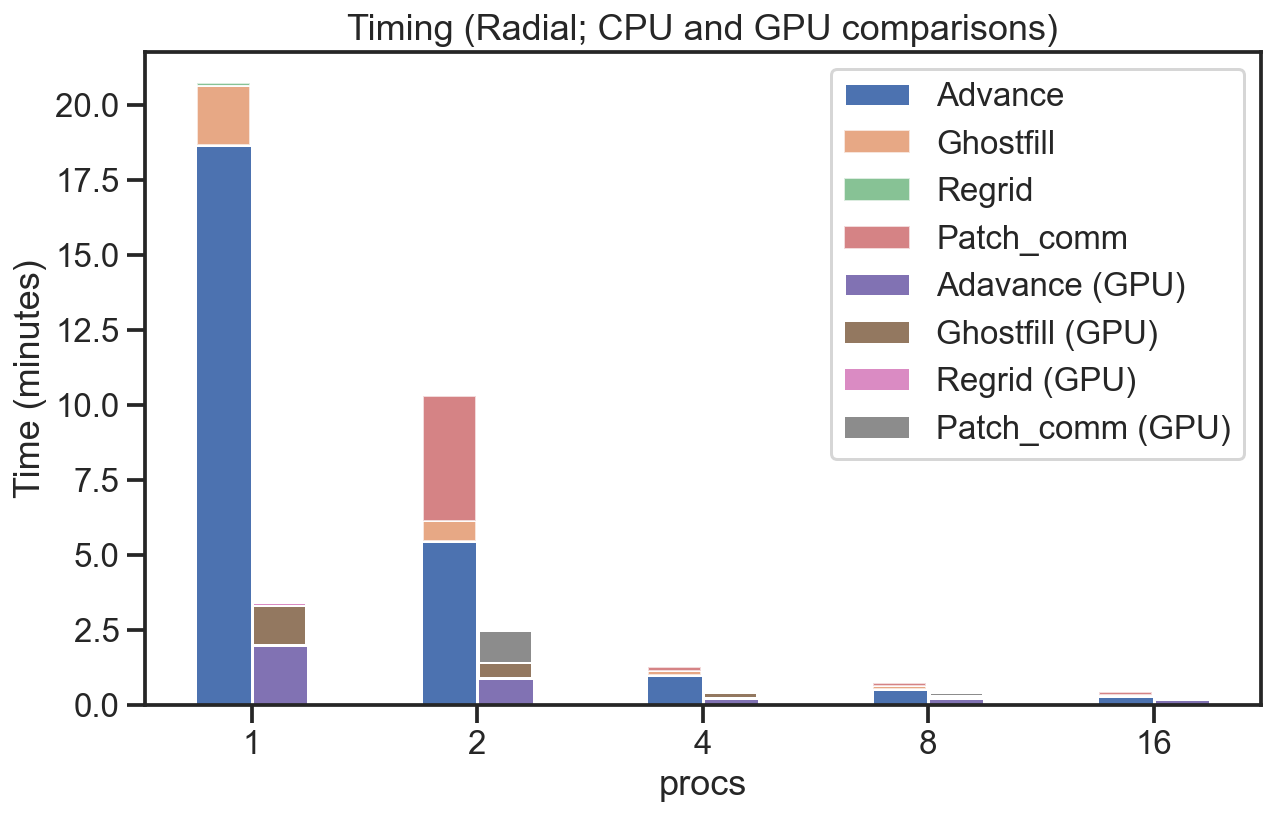

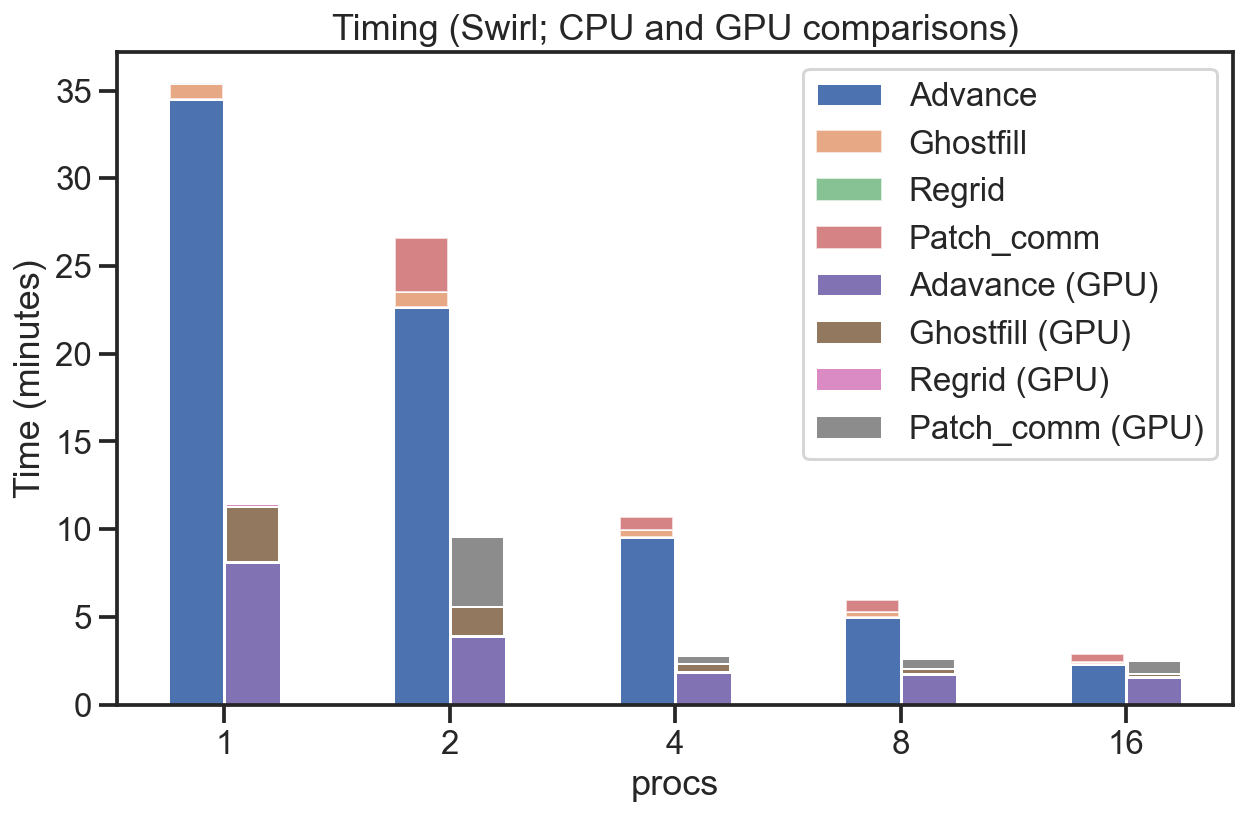

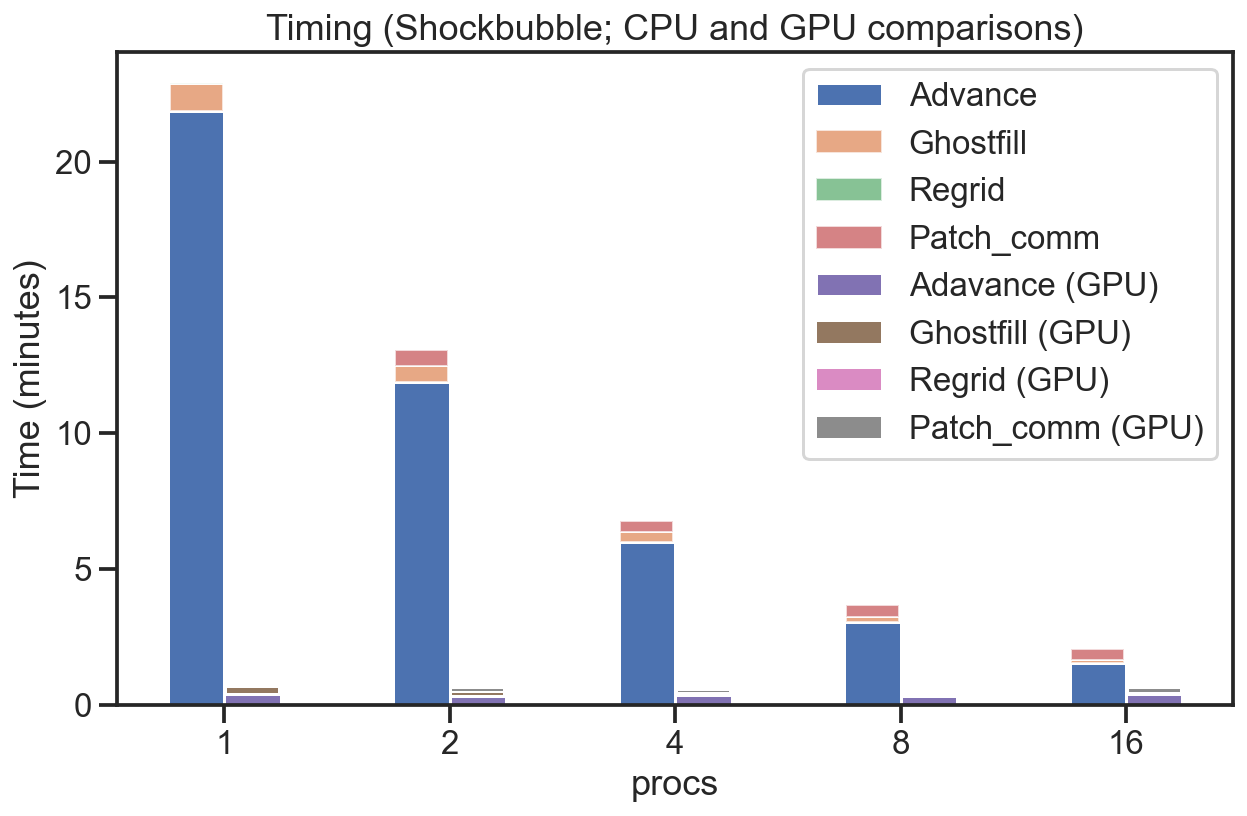

In [37]:
adv = df.loc[idx[:, 'CPU':'GPU'], ['advance','ghostfill','regrid','patch_comm']].unstack()
bum = adv.loc['bump']/60
rad = adv.loc['radial']/60
swi = adv.loc['swirl']/60
shock = adv.loc['shockbubble']/60

plot_(bum,'Bump')
plot_(rad,'Radial')
plot_(swi,'Swirl')
plot_(shock,'Shockbubble')

In [55]:
def plot_w(a,b,c,d):
    import seaborn as sns
    
    pos_mut_pcts = array(a.iloc[0])
    pos_cna_pcts = array(b.iloc[0])
    pos_both_pcts = array(c.iloc[0])
    pos = array(d.iloc[0])
    neg = array(d.iloc[1])
    neg_mut_pcts = array(a.iloc[1])
    neg_cna_pcts = array(b.iloc[1])
    neg_both_pcts = array(c.iloc[1])
    genes = ['1','2','4','8','16']

    with sns.axes_style("white"):
        sns.set_style("ticks")
        sns.set_context("talk")

        # plot details
        bar_width = 0.25
        epsilon = .015
        line_width = 1
        opacity = 0.7
        pos_bar_positions = np.arange(len(pos_mut_pcts))
        neg_bar_positions = pos_bar_positions + bar_width


        # make bar plots
        plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                                  label='Bump')
        plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                                  bottom=pos_mut_pcts,
                                  alpha=opacity,
                                  linewidth=line_width,
                                  label='Radial')
        plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                                   bottom=pos_cna_pcts+pos_mut_pcts,
                                   alpha=opacity,
                                   linewidth=line_width,
                                   label='Swirl')
        plt.bar(pos_bar_positions, pos, bar_width-epsilon,
                                   bottom=pos_cna_pcts+pos_mut_pcts,
                                   alpha=opacity,
                                   linewidth=line_width,
                                   label='Shockbubble')
        plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                                  label='Bump (GPU)')
        plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                                  bottom=neg_mut_pcts,
                                  linewidth=line_width,
                                  label='Radial (GPU)')
        plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                                   bottom=neg_cna_pcts+neg_mut_pcts,
                                   linewidth=line_width,
                                   label='Swirl (GPU)')
        plt.bar(neg_bar_positions, neg, bar_width-epsilon,
                                   bottom=neg_cna_pcts+neg_mut_pcts,
                                   linewidth=line_width,
                                   label='Shockbubble (GPU)')

        plt.xticks((neg_bar_positions+pos_bar_positions)/2, genes, rotation=360)
        plt.ylabel('Walltime (minutes)')
        plt.xlabel('procs')
        plt.legend()
        plt.title('Walltime CPU and GPU comparisons')
        plt.savefig('wall')
        plt.show()

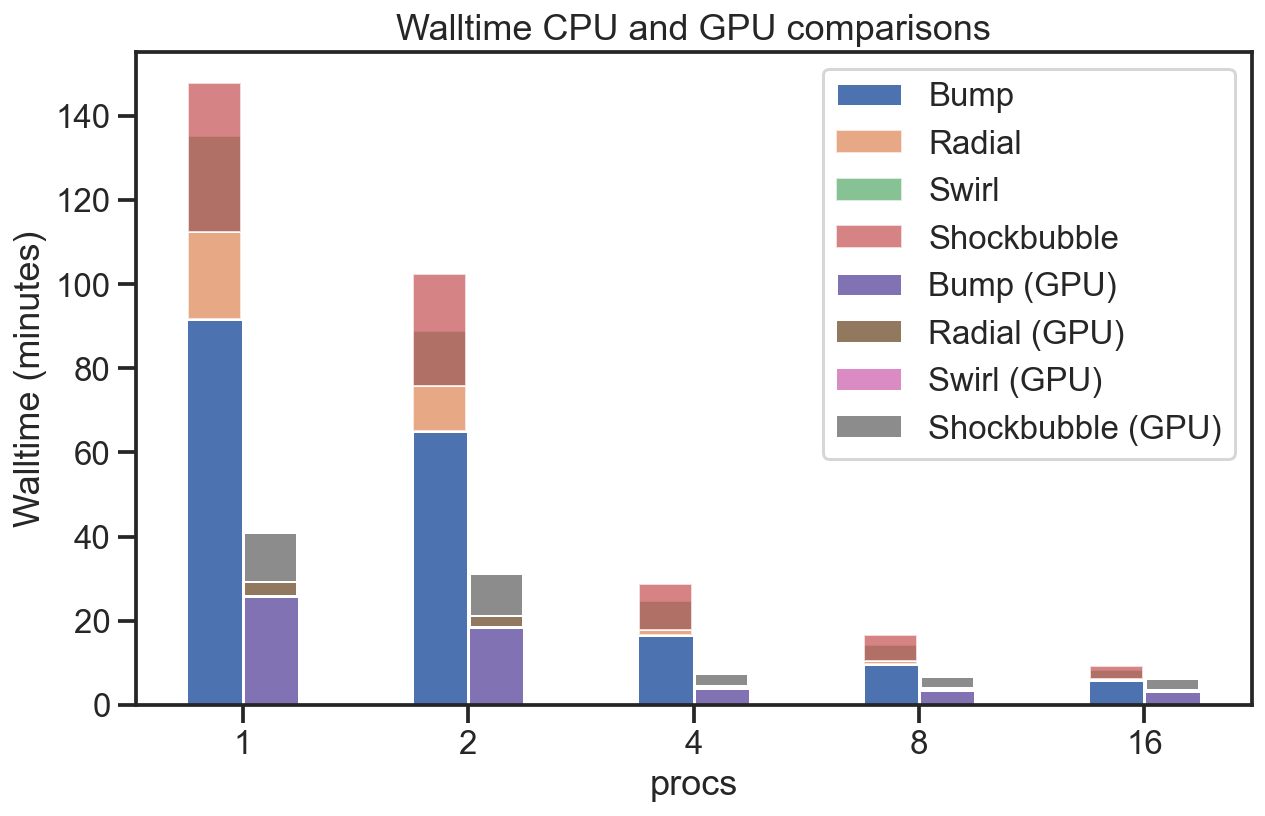

In [56]:
adv = df.loc[idx[:, 'CPU':'GPU'], ['walltime']].unstack()
bum = adv.loc['bump']/60
rad = adv.loc['radial']/60
swi = adv.loc['swirl']/60
shock = adv.loc['shockbubble']/60

plot_w(bum,rad,shock,swi)

In [103]:
sns.set_style("ticks")
sns.set_context("talk")

In [121]:
adv = df.loc[idx[:, 'CPU':'GPU'], ['walltime','advance']].unstack()
bum = adv.loc['bump']/60
rad = adv.loc['radial']/60
swi = adv.loc['swirl']/60
shock = adv.loc['shockbubble']/60

def speedup(bump,bum_s):
    a = bump.loc[:,'walltime']
    b = bump.loc[:,'advance']

    wall_cpu = array(a.iloc[0]/a.iloc[1][1])
    wall_a = array(b.iloc[0]/b.iloc[1][1])
    index = ['1','2','4','8','16']

    dfp = pandas.DataFrame({'Walltime': wall_cpu,
                   'Advance': wall_a}, index=index)

    ax = dfp.plot.bar(rot=0)
    plt.ylabel('speedup')
    plt.xlabel('procs')
    plt.savefig(bum_s)
    plt.title('Speedup ({:s}'.format(bum_s)+'; One GPU over multi-core CPU)')
    plt.show()


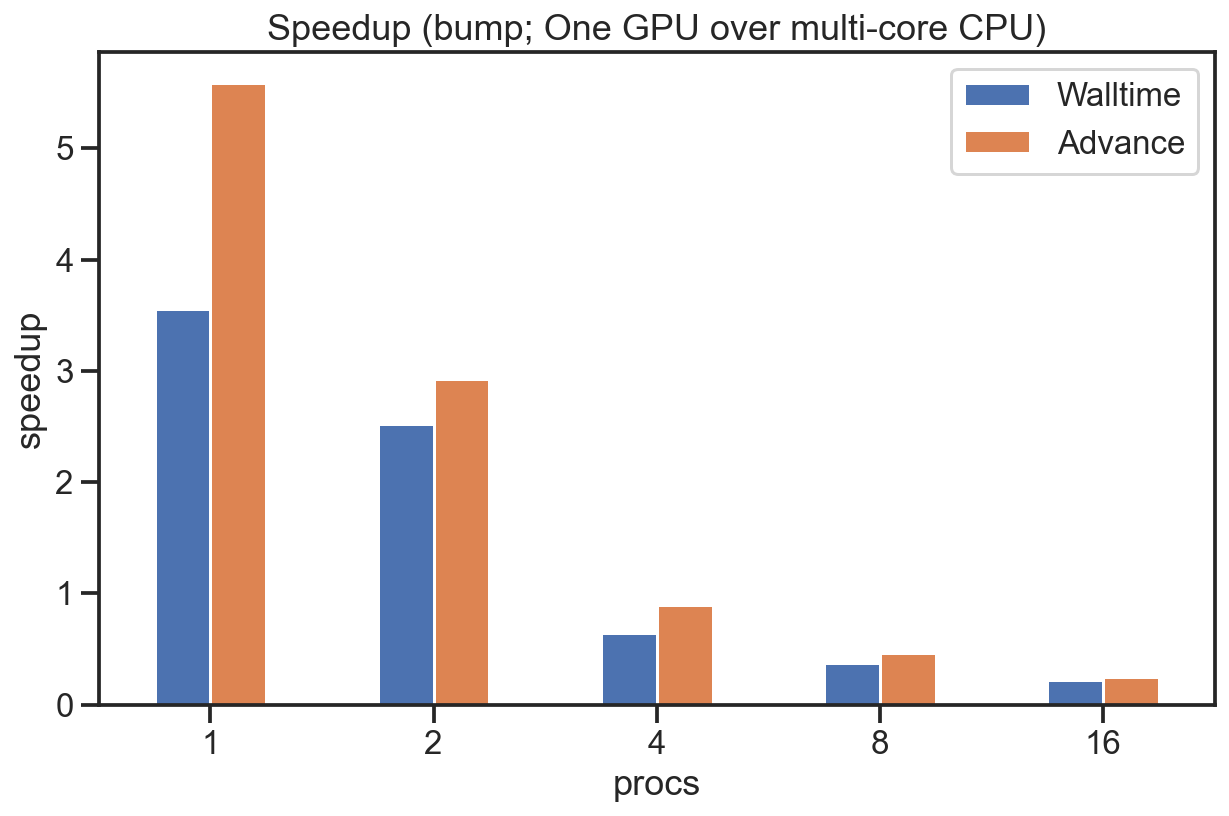

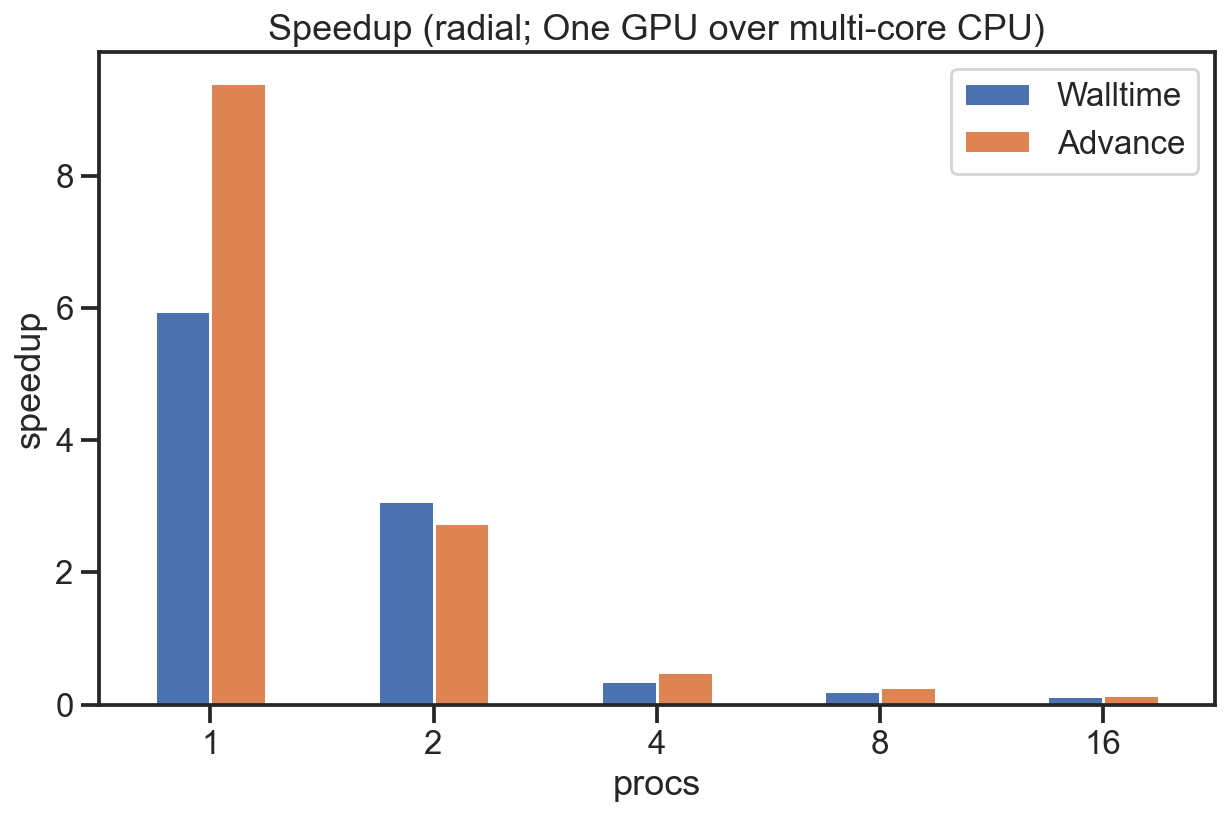

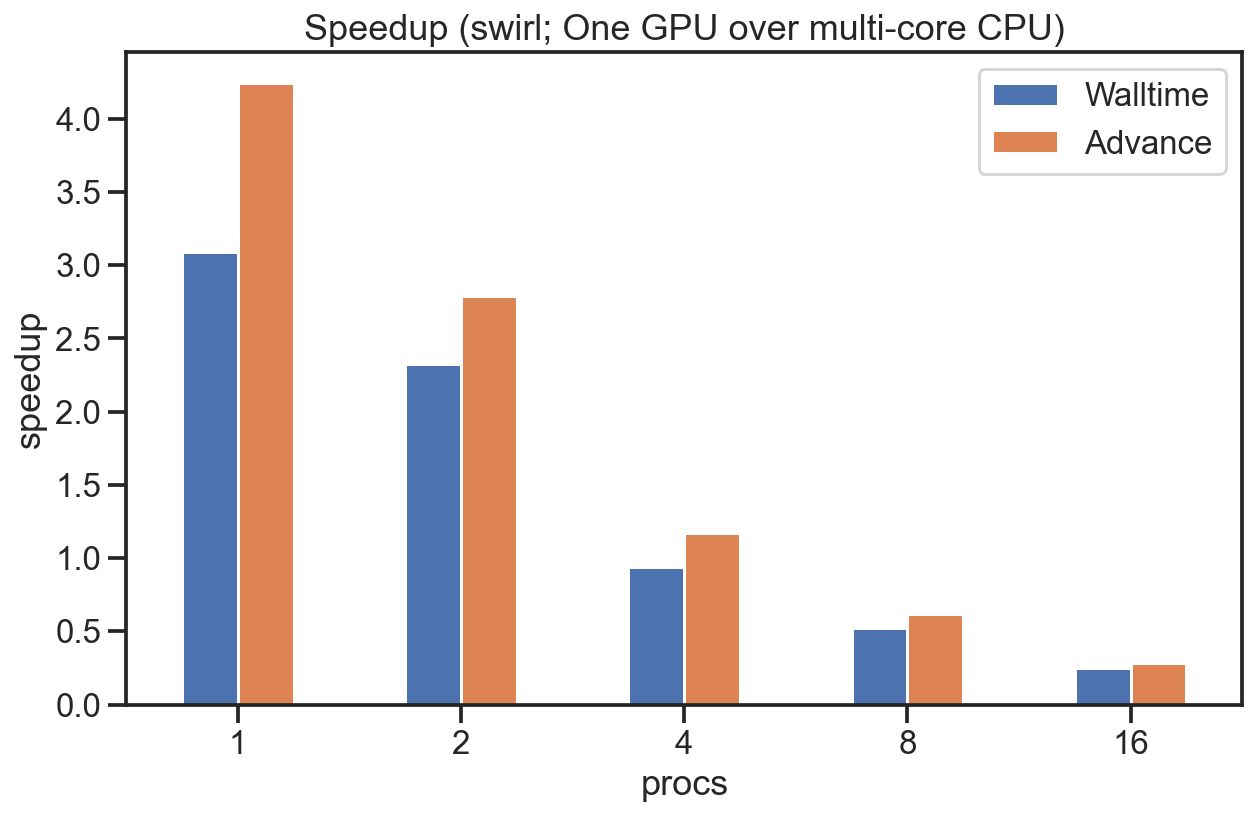

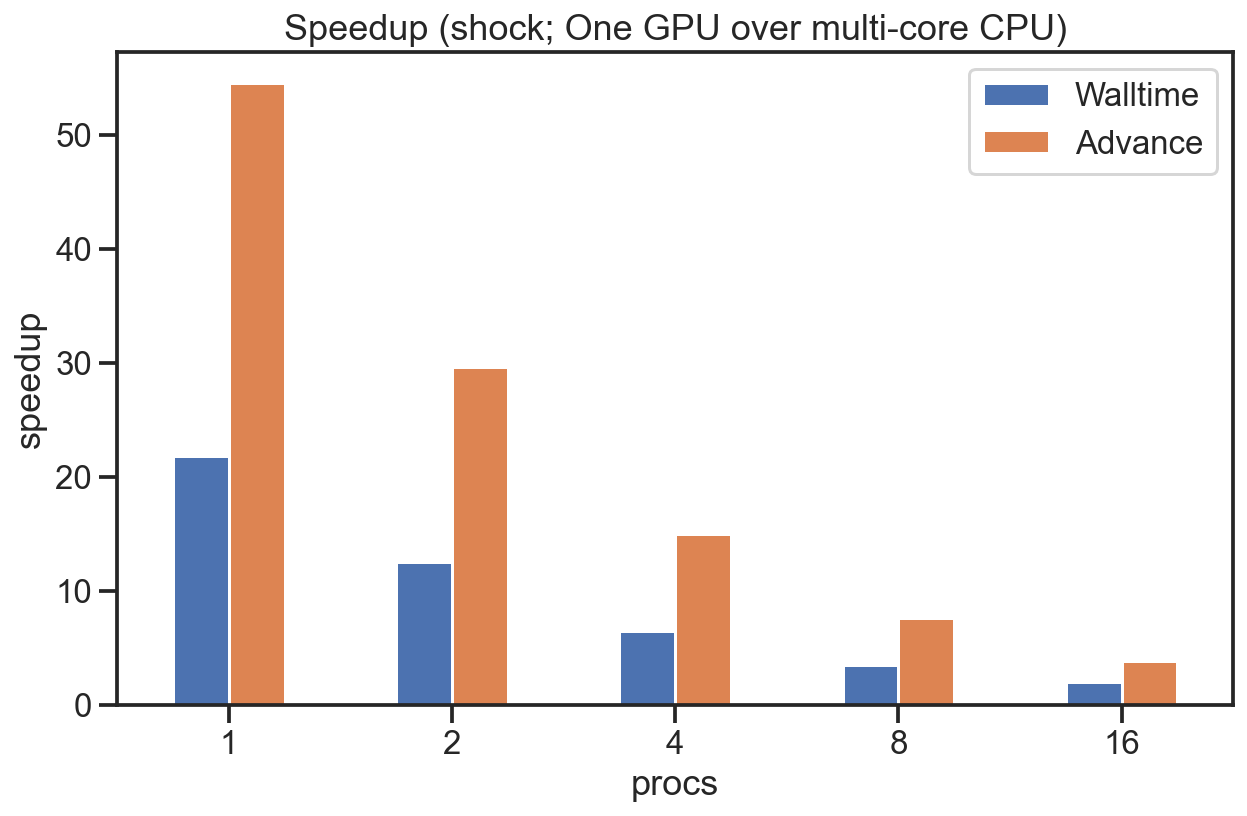

In [122]:
speedup(bum,'bump')
speedup(rad,'radial')
speedup(swi,'swirl')
speedup(shock,'shock')

In [75]:
shock.iloc[1]#/bum.iloc[0][1])

          procs
walltime  1        1.050383
          2        0.945667
          4        0.677317
          8        0.593250
          16       0.735483
advance   1        0.400633
          2        0.316717
          4        0.352383
          8        0.298717
          16       0.376150
Name: GPU, dtype: float64

In [123]:
pi

3.141592653589793